In [ ]:
def fib(i):
    a = 1
    b = 1
    arr = [a, b]
    if (i >= 3):
        for k in range(i-2):
            a, b = b, a+b
            arr.append(b)
    return arr

In [ ]:
def fib(i):
    c = 1
    yield a
    b = 1
    yield b
    arr = [a, b]
    if (i >= 3):
        for k in range(i-2):
            a, b = b, a+b
            yield b
    return arr

In [ ]:
for i in fib(...)
body(i)

<=>

a = fib(...).__init__()
while True:
    try:
        i = next(a)
        body(i)
    except StopIteration
        break

In [1]:
def summary(arr):
    return {'min':min(arr), 'max':max(arr), 'mean':sum(arr)/len(arr)}

def summary2(arr):
    return {'min':min(arr), 'max':max(arr), 'mean':sum(arr)}

In [2]:
def decorate(f, arr):
    res = f(arr)
    for i in res:
        print('{}:\t{}'.format(i, res[i]))

In [3]:
decorate(summary2, [1,5,3,7,3,5,3])

min:	1
max:	7
mean:	27


In [4]:
def pprint(f):
    def inner(arr):
        res = f(arr)
        for i in res:
            print('{}:\t{}'.format(i, res[i]))
    return inner

In [5]:
summary = pprint(summary)

In [6]:
summary([1,5,3,7,3,5,3])

min:	1
max:	7
mean:	3.857142857142857


In [7]:
@pprint
def summary2(arr):
    return {'min':min(arr), 'max':max(arr), 'mean':sum(arr)}

In [8]:
summary2([1,5,3,7,3,5,3])

min:	1
max:	7
mean:	27


In [ ]:
import pickle
with open(filename, 'wb') as file:
    pickle.dump(...)

In [ ]:
import collections
collections.Counter #количесво вхождений каждого элемента в arr
c = Counter(array)
print(c[key])
c.clear()
collections.defaultdict
d = defaultdict(int)
d['key']+=1
collections.OrderedDict #сохраняется порядок добавления
collections.deque #очередь, можно добавлять вконец или вниз
collections.deque.pop
collections.deque.popleft
collections.deque.append
collections.deque.appendleft
collections.deque.extend
collections.namedtuple #хранения С-образных структур




In [ ]:
map(f, arr) #применение f к каждому элементу arr
zip(arr1, arr2) #возвращает генератор кортежей элементов массивов
filter(f, arr) #возвращает генератор
functools.reduce(f(x,y), arr) #f(f(f(f(0,1),2),3),4)

def f(x, y):
    return x+y

In [21]:
import numpy as np
#x = [1,2,3,4]
#y = [1,1,4,4]
k = 1
b = 1
#y = k*x+b
#y = k*x[i]+b
N = 100000
arr = np.arange(1, N+1)/N
dic = {}
for k in arr:
    summ = 0
    for i in range(len(x)):
        summ += (k*x[i]+b - y[i])**2
    MSE = 1/len(x)*summ
    dic[MSE]=k
#    print('k = ', k, 'MSE =', MSE)
min_MSE = min(dic)
print(dic[min_MSE])

0.7


In [176]:
import numpy as np
Y = [1,1,-4,-4]
X = [1,2,3,5]

def find_max_abs(Z):
    ZZ = []
    for i in range(len(Z)):
        ZZ.append(abs(Z[i]))
    return max(ZZ)

x = np.array(X)/max(find_max_abs(X), find_max_abs(Y))
y = np.array(Y)/max(find_max_abs(X), find_max_abs(Y))
k1 = 1.5
b1 = 1.0
#y = k*x+b
#y = k*x[i]+b
grand_MSE = np.array([0, 0], dtype=float)
grand_MSE_01 = 0.0
grand_MSE_02 = 0.0
vect0 = [k1, b1]
alpha = 0.1
e = 1e-5
summ = 0
vect= np.array(vect0)
for i in range(len(x)):
    grand_MSE = np.array([0.0,0.0])
    grand_MSE_01 = x[i]*(vect[0]*x[i]+vect[1] - y[i])
    grand_MSE_02 = vect[0]*x[i]+vect[1] - y[i]
    grand_MSE += 1/len(x)*np.array([grand_MSE_01, grand_MSE_02])
vect = vect - 2*alpha*grand_MSE

while(2*alpha*np.linalg.norm(grand_MSE) > e):
    grand_MSE = np.array([0.0,0.0])
    for i in range(len(x)):
        grand_MSE_01 = x[i]*(vect[0]*x[i]+vect[1] - y[i])
        grand_MSE_02 = vect[0]*x[i]+vect[1] - y[i]
        grand_MSE += 1/len(x)*np.array([grand_MSE_01, grand_MSE_02])
    vect = vect - 2*alpha*grand_MSE
print(vect)

[-1.42793286  0.48533822]


[-1.42793286  0.48533822]
1 5


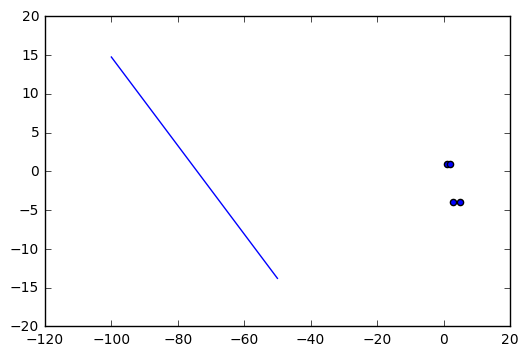

In [179]:
import matplotlib.pyplot as plt
print(vect)
plt.scatter(X, Y)
print(min(X), max(X))
plt.plot([-100, -50],[-10*vect[0]+vect[1] ,10*vect[0]+vect[1]])
plt.show()